## English Premier League (EPL) Results

### Dataset info

|Column|	Description|
|-|-|
|Season|	Match Season|
|DateTime|	Match Date and Time (yyyy-mm-dd hh:mm:ss)|
|HomeTeam|	Home Team|
|AwayTeam|	Away Team|
|FTHG|	Full Time Home Team Goals|
|FTAG|	Full Time Away Team Goals|
|FTR|	Full Time Result (H=Home Win, D=Draw, A=Away Win)|
|HTHG|	Half Time Home Team Goals|
|HTAG|	Half Time Away Team Goals|
|HTR|	Half Time Result (H=Home Win, D=Draw, A=Away Win)|
|Referee|	Match Referee|
|HS|Home Team Shots|
|AS|Away Team Shots|
|HST|	Home Team Shots on Target|
|AST|	Away Team Shots on Target|
|HC|	Home Team Corners|
|AC|	Away Team Corners|
|HF|	Home Team Fouls Committed|
|AF|	Away Team Fouls Committed|
|HY|	Home Team Yellow Cards|
|AY|	Away Team Yellow Cards|
|HR|	Home Team Red Cards|
|AR|	Away Team Red Cards|

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
# Какие данные мы будем обрабатывать
table = pd.read_csv('./premier-league.csv', encoding = 'ISO-8859-1')
table.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


In [9]:
# Общая информация о датасете
print(f'info:\n{table.info(verbose=False)}\n')
print(f'shape: {table.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Columns: 23 entries, Season to AR
dtypes: float64(14), int64(2), object(7)
memory usage: 2.0+ MB
info:
None

shape: (11113, 23)


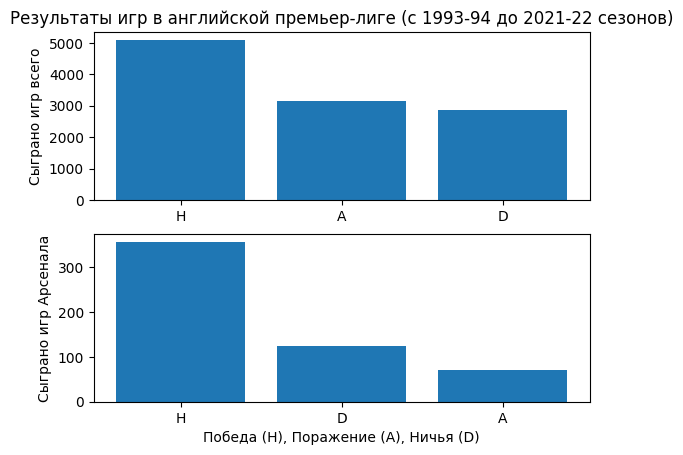

In [10]:
fig, ax = plt.subplots(2)

ftr = table['FTR'].value_counts()
arcenal_ftr = table[table.HomeTeam == 'Arsenal']['FTR'].value_counts()

had = ftr.index, arcenal_ftr.index 
frequency = ftr.values, arcenal_ftr.values 

for i in range(2):
    ax[i].bar(had[i], frequency[i])

ax[0].set_title('Результаты игр в английской премьер-лиге (с 1993-94 до 2021-22 сезонов)') 
ax[1].set_xlabel('Победа (H), Поражение (A), Ничья (D)')
ax[0].set_ylabel('Сыграно игр всего')
ax[1].set_ylabel('Сыграно игр Арсенала')

plt.show()

In [11]:
# Обработка датасета
table.dropna(axis=0, inplace=True)
table.drop(['Season', 'Referee'], axis=1, inplace=True)
table.reset_index(drop=True, inplace=True)

In [12]:
table['MatchDate'] = pd.to_datetime(table['DateTime'], infer_datetime_format=True)
table['MatchDay'] = table['MatchDate'].dt.day_name()

table.drop('DateTime', axis=1, inplace=True)
table.drop('MatchDate', axis=1, inplace=True)

table = pd.get_dummies(table, 
                       columns=['HomeTeam', 'AwayTeam', 'HTR', 'MatchDay'],
                       prefix = ['HomeTeam', 'AwayTeam', 'HTR', 'MatchDay']
)

print('hey')

hey


In [13]:
label_encoder = LabelEncoder()

table['FTR'] = label_encoder.fit_transform(table['FTR']) 
unique = table['FTR'].unique()

X = pd.concat([table.iloc[:, :2], table.iloc[:, 3:]], axis=1)
y = np.ravel(table['FTR'])

X

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,...,HTR_A,HTR_D,HTR_H,MatchDay_Friday,MatchDay_Monday,MatchDay_Saturday,MatchDay_Sunday,MatchDay_Thursday,MatchDay_Tuesday,MatchDay_Wednesday
0,4,0,2.0,0.0,17.0,8.0,14.0,4.0,6.0,6.0,...,0,0,1,0,0,1,0,0,0,0
1,4,2,1.0,0.0,17.0,12.0,10.0,5.0,7.0,7.0,...,0,0,1,0,0,1,0,0,0,0
2,1,3,1.0,1.0,6.0,16.0,3.0,9.0,8.0,4.0,...,0,1,0,0,0,1,0,0,0,0
3,2,2,1.0,2.0,6.0,13.0,4.0,6.0,5.0,8.0,...,1,0,0,0,0,1,0,0,0,0
4,2,0,2.0,0.0,17.0,12.0,8.0,6.0,6.0,4.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,0,4,0.0,1.0,9.0,11.0,8.0,5.0,9.0,3.0,...,1,0,0,0,0,1,0,0,0,0
8285,2,0,0.0,0.0,15.0,5.0,7.0,1.0,4.0,6.0,...,0,1,0,0,0,0,1,0,0,0
8286,2,1,2.0,0.0,12.0,11.0,3.0,3.0,3.0,4.0,...,0,0,1,0,0,0,1,0,0,0
8287,2,0,1.0,0.0,17.0,18.0,6.0,4.0,6.0,7.0,...,0,0,1,0,0,0,1,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)